# Google Data Analytics Capstone: Bike Sharing Company

## Import Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

## Importing Datasets

In [3]:
january = pd.read_csv('january_2022_tripdata.csv')
february = pd.read_csv('february_2022_tripdata.csv')
march = pd.read_csv('march_2022_tripdata.csv')
april = pd.read_csv('april_2022_tripdata.csv')
may = pd.read_csv('may_2022_tripdata.csv')
june = pd.read_csv('june_2022_tripdata.csv')
july = pd.read_csv('july_2022_tripdata.csv')
august = pd.read_csv('august_2022_tripdata.csv')
september = pd.read_csv('september_2022_tripdata.csv')
october = pd.read_csv('october_2022_tripdata.csv')
november = pd.read_csv('november_2022_tripdata.csv')
december = pd.read_csv('december_2022_tripdata.csv')


In [4]:
monthly_df_list= [january,february,march,april,may,june,july,august,september,october,november,december]
total_rows = 0
for month in monthly_df_list:
    total_rows += month.shape[0]
#     print(months.columns)
print(total_rows)

5667717


In [5]:
df_all = pd.concat(monthly_df_list,axis=0,ignore_index=True)

In [6]:
df_all.shape

(5667717, 13)

In [7]:
df_all.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member


### Data Inspection

In [8]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5667717 entries, 0 to 5667716
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 562.1+ MB


In [9]:
df_all.ride_id.apply(lambda x: len(x)).value_counts()

ride_id
16    5667639
11         47
8          21
10          8
9           2
Name: count, dtype: int64

In [10]:
df_all.duplicated().sum()

0

In [11]:
df_null_value = df_all.isnull().sum()
df_null_value

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    833064
start_station_id      833064
end_station_name      892742
end_station_id        892742
start_lat                  0
start_lng                  0
end_lat                 5858
end_lng                 5858
member_casual              0
dtype: int64

<Axes: >

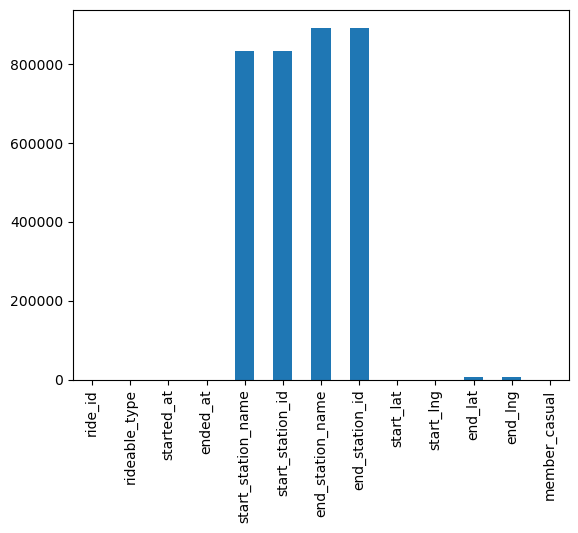

In [12]:
df_null_value.plot(kind='bar')

In [13]:
# remove null value in column  'end_lat','end_lng'

df_all.dropna(subset=['end_lat','end_lng'],how='any',inplace=True)

In [14]:
#convert 'started_at', 'ended_at' to datetime dtype
df_all['started_at']= pd.to_datetime(df_all['started_at'])
df_all['ended_at']= pd.to_datetime(df_all['ended_at'])

In [15]:
# Convert 'start_station_id' and 'end_station_id' to string 
df_all['start_station_id'] = df_all['start_station_id'].astype(str)
df_all['end_station_id'] = df_all['end_station_id'].astype(str)



In [16]:
#drop irrelevant columns 'start_station_id', 'end_station_id', 'ride_id'
df_all = df_all.drop(['start_station_id', 'end_station_id'],axis=1)


In [17]:
#filling missing value in columns with 'unknown' in (start_station_name','end_station_name')
df_all['start_station_name'].fillna('Unknown',inplace=True)
df_all['end_station_name'].fillna('Unknown',inplace=True)

In [18]:
threshold = 20000

for column in ['start_station_name', 'end_station_name']:
    # get frequency of each label
    freq = df_all[column].value_counts()
    # find labels below threshold
    rare_labels = freq[freq < threshold].index
    # replace rare labels with 'Other'
    df_all[column] = df_all[column].apply(lambda x: 'Other' if x in rare_labels else x)

In [20]:
# adding columns for weekday, month
# Create 'day_of_week' feature
df_all['day_of_week'] = df_all['started_at'].dt.dayofweek + 1  # Monday is 0, Sunday is 6 by default

# Transform Monday to be 7, and then change Sunday to be 1 (Monday will be changed back to 1 as well)
df_all['day_of_week'] = df_all['day_of_week'] % 7 + 1

df_all['month']= df_all['started_at'].dt.month
df_all['hours']= df_all['started_at'].dt.hour
df_all['year'] = df_all['started_at'].dt.year


member_casual
casual    2316863
member    3344996
Name: ride_id, dtype: int64


<Axes: xlabel='member_casual', ylabel='count'>

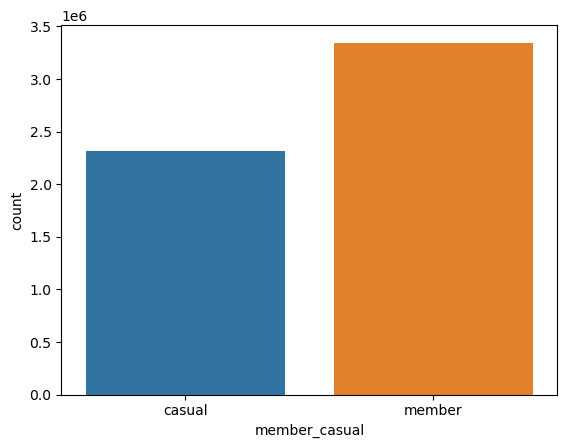

In [21]:
print(df_all.groupby('member_casual')['ride_id'].count())
sns.countplot(x='member_casual',data=df_all)

In [22]:
df_all.pivot_table(index='rideable_type',columns='member_casual',values='ride_id',aggfunc='count')

member_casual,casual,member
rideable_type,,
classic_bike,888906.0,1709066.0
docked_bike,174858.0,NaN
electric_bike,1253099.0,1635930.0


<Axes: xlabel='rideable_type', ylabel='count'>

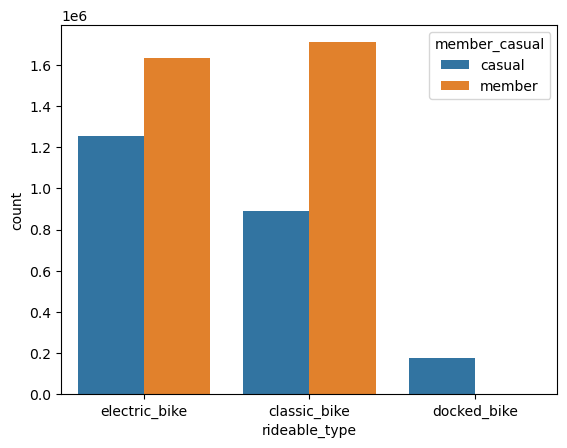

In [23]:
sns.countplot(x='rideable_type',data=df_all,hue='member_casual')

<Axes: xlabel='count', ylabel='start_station_name'>

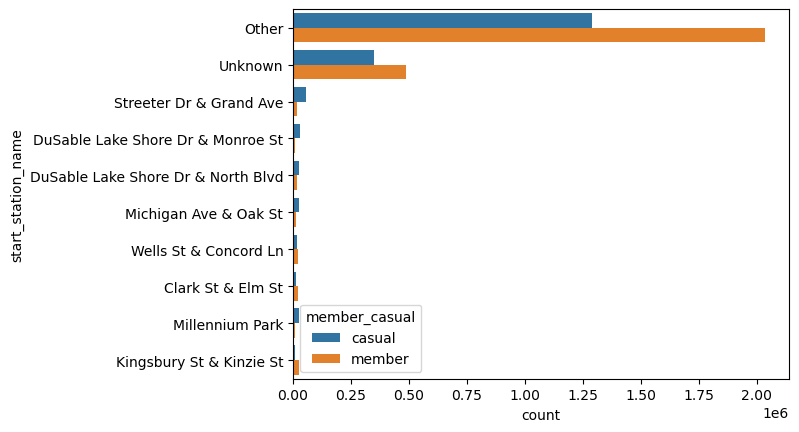

In [24]:
# Calculate the top 10 start stations
top_stations = df_all['start_station_name'].value_counts().head(10).index

# Filter the data to include only the top 10 start stations
top_stations_data = df_all[df_all['start_station_name'].isin(top_stations)]

# Create the countplot
sns.countplot(y='start_station_name', hue='member_casual', data=top_stations_data, order=top_stations)

<Axes: xlabel='count', ylabel='start_station_name'>

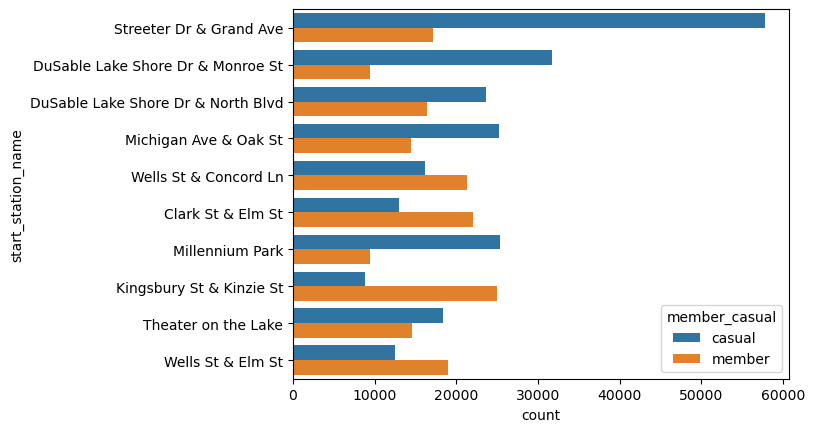

In [25]:
# Exclude "Other" and "Missing" from the data
filtered_data = df_all[~df_all['start_station_name'].isin(['Other', 'Unknown'])]
# Calculate the top 10 end stations
top_start_stations = filtered_data['start_station_name'].value_counts().head(10).index

# Filter the data to include only the top 10 end stations
top_start_stations_data = filtered_data[filtered_data['start_station_name'].isin(top_start_stations)]

# Create the countplot
sns.countplot(y='start_station_name', hue='member_casual', data=top_start_stations_data, order=top_start_stations)

In [26]:
#create a mapping dictionary
day_mapping = {1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thrusday',5:'Friday',6:'Saturday',7:'Sunday'}
# Map the numerical values to actual days of the week
df_all['day_of_week'] = df_all['day_of_week'].replace(day_mapping)
# convert day of week to categorical type  with proper order
df_all['day_of_week'] = pd.Categorical(df_all['day_of_week'],categories=['Monday','Tuesday','Wednesday','Thrusday','Friday','Saturday','Sunday'],ordered=True)

<Axes: xlabel='day_of_week', ylabel='count'>

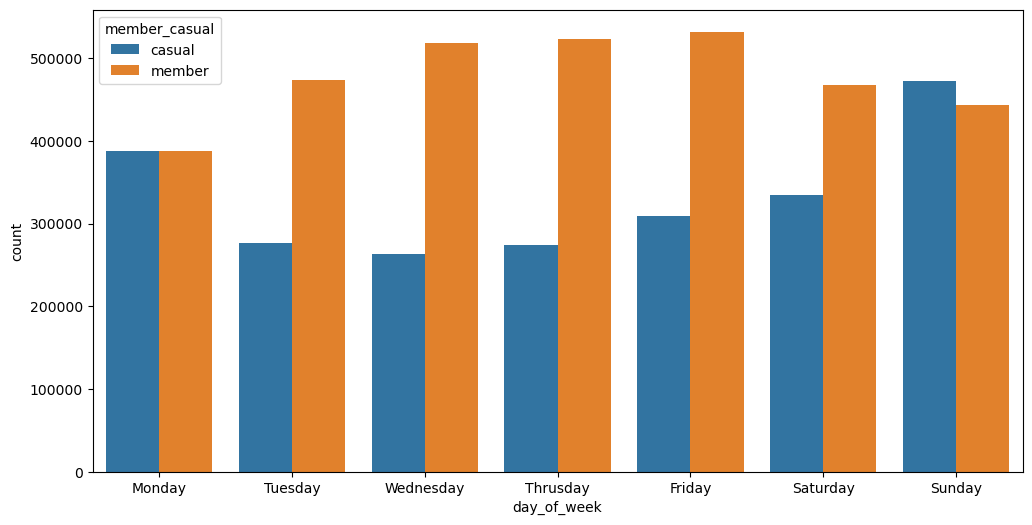

In [27]:
#Duration of rides by the day of week for casual and members users
plt.figure(figsize=(12,6))
sns.countplot(x='day_of_week',hue= 'member_casual',data=df_all)

<Axes: xlabel='hours', ylabel='ride_id'>

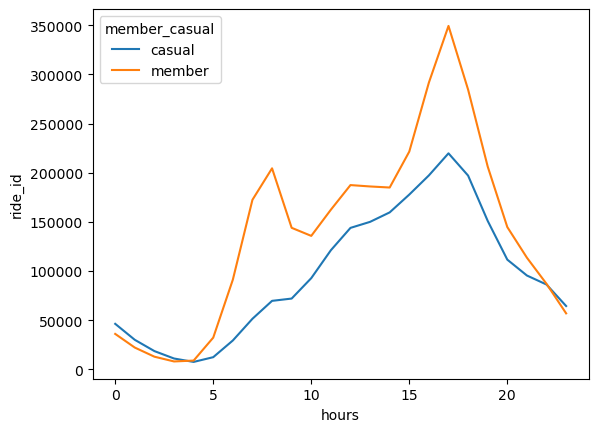

In [28]:
# grouped the data for hour plot
grouped_hour = df_all.groupby(['hours','member_casual'])['ride_id'].count().reset_index()

sns.lineplot(x='hours', y='ride_id', hue='member_casual', data=grouped_hour)


In [29]:


# Create a line plot with Plotly Express
fig = px.line(grouped_hour, x='hours', y='ride_id', color='member_casual', markers=True)

# Customize the layout if needed
fig.update_layout(
    title="Hourly Ride Count by Member Type",
    xaxis_title="Hours",
    yaxis_title="Ride Count",
)

# Show the plot
fig.show()


<Axes: xlabel='hours', ylabel='ride_id'>

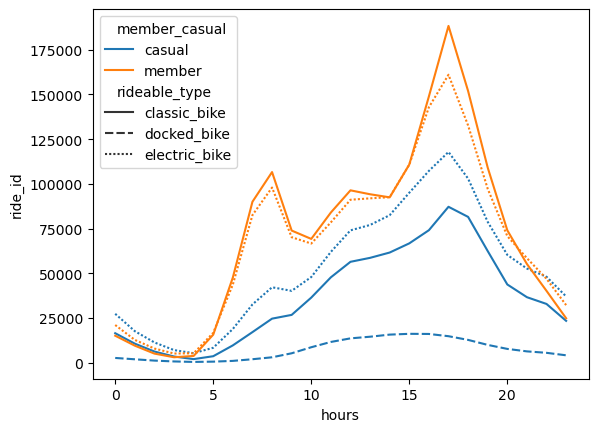

In [30]:
# grouped the data for hour plot
grouped_hour = df_all.groupby(['hours','member_casual','rideable_type'])['ride_id'].count().reset_index()
sns.lineplot(x='hours', y='ride_id', hue='member_casual', style='rideable_type',data=grouped_hour)

In [31]:
fig = px.line(grouped_hour,x='hours', y='ride_id', color='member_casual', line_dash='rideable_type',markers=True)
# Customize the layout if needed
fig.update_layout(
    title="Hourly Ride Count by Member Type",
    xaxis_title="Hours",
    yaxis_title="Ride Count",
)

fig.show()

Text(0.5, 1.0, 'Distribution of Riders by Months for casual and Member Users')

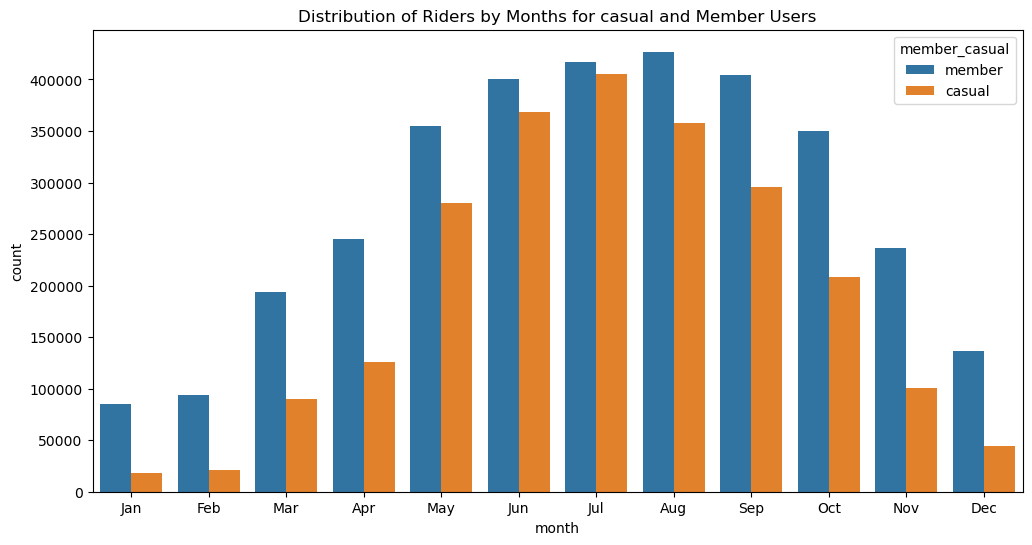

In [32]:
month_map = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
df_all['month']= df_all['month'].replace(month_map)
df_all['month'] =pd.Categorical(df_all['month'],categories=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

month_data = df_all.groupby(['month','member_casual'])['ride_id'].count().reset_index()
plt.figure(figsize=(12,6))
sns.countplot(x='month',hue='member_casual',data=df_all,hue_order=['member','casual'])
plt.title('Distribution of Riders by Months for casual and Member Users')

In [33]:
month_data_px = df_all.groupby(['month','member_casual','rideable_type'])['ride_id'].count().reset_index()

fig = px.line(month_data_px,x='month',y='ride_id',color='member_casual',markers=True,line_dash='rideable_type')
fig.update_layout(
    title=('Distribution of Riders by Month for Casual and Member Users'),
    xaxis_title=('Month'),
    yaxis_title=('Ride Count')
)

fig.show()

In [34]:
group_data= df_all.groupby(['member_casual','hours'])['ride_time'].mean().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(x='hours',y='ride_time',hue='member_casual',data=group_data)

KeyError: 'Column not found: ride_time'

In [ ]:
group_data_px= df_all.groupby(['member_casual','hours','rideable_type'])['ride_time'].mean().reset_index()

fig = px.histogram(group_data_px,x='hours',y='ride_time',color='member_casual',nbins=40)


fig.show()



Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'end_station_name', 'start_lat', 'start_lng',
       'end_lat', 'end_lng', 'member_casual', 'ride_time', 'day_of_week',
       'month', 'hours', 'year'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
Index: 5661859 entries, 0 to 5667716
Data columns (total 16 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   end_station_name    object        
 6   start_lat           float64       
 7   start_lng           float64       
 8   end_lat             float64       
 9   end_lng             float64       
 10  member_casual       object        
 11  ride_time           float64       
 12  day_of_week         category      
 13  month               category      
 14  hours               int32         
 15  year                int32         
dtypes: category(2), datetime64[ns](2), float64(5), int32(2), object(5)
memory usage: 615.6+ MB
